# Урок 4. Визуальный анализ данных

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv ('kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Задача 1


### Задача 1.1

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Задача 1.2 Изучите стоимости недвижимости

Text(0, 0.5, 'Количество')

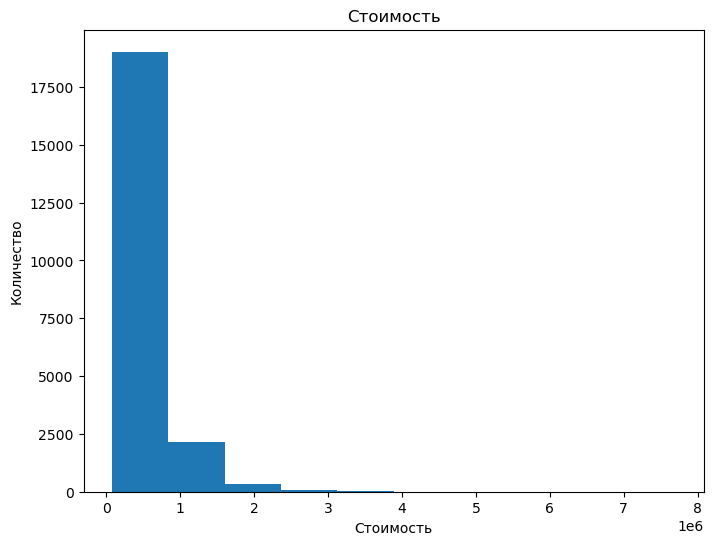

In [4]:
plt.figure (figsize=(8,6))
plt.hist (df ['price'])
plt.title ('Стоимость')
plt.xlabel ('Стоимость')
plt.ylabel ('Количество')

//Больше всего продано квартир стоимостью до 1 млн.

### Задача 1.3 Изучите распределение квадратуры

Text(0, 0.5, 'Количество')

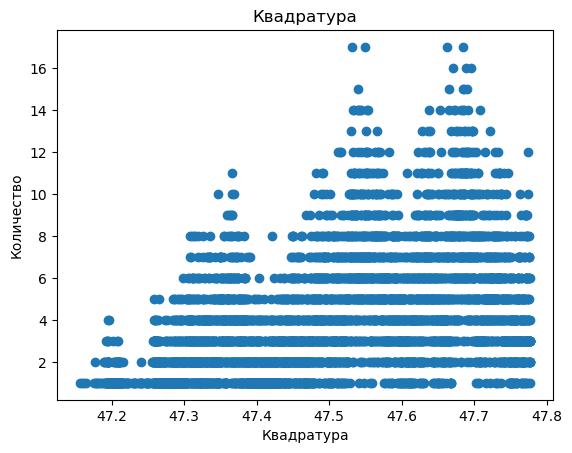

In [7]:
counts=df ['lat'].value_counts()
plt.scatter (x=counts.index, y=counts.values)
plt.title ('Квадратура')
plt.xlabel ('Квадратура')
plt.ylabel ('Количество')


// Больше всего квартир продано с площадью 47,5 и 47,7 кв.м.

### Задача 1.4 Изучите распределение года постройки

Text(0, 0.5, 'Количество')

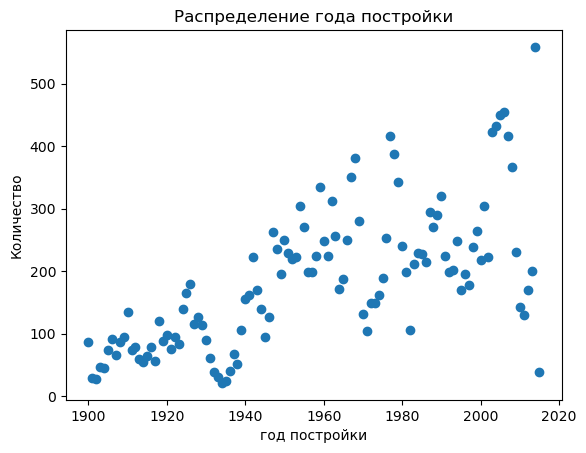

In [8]:
counts=df ['yr_built'].value_counts()
plt.scatter (x=counts.index, y=counts.values)
plt.title ('Распределение года постройки')
plt.xlabel ('год постройки')
plt.ylabel ('Количество')

// Большей популярностью пользовались квартиры постройки в 2020 г. Но и на недвижимость 20 летней давности был спрос.

## Задача 2

### Задача 2.1 Изучите распределение домов от наличия вида на набережную

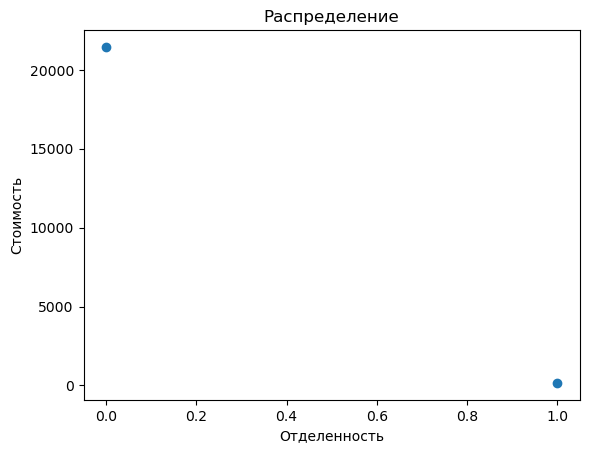

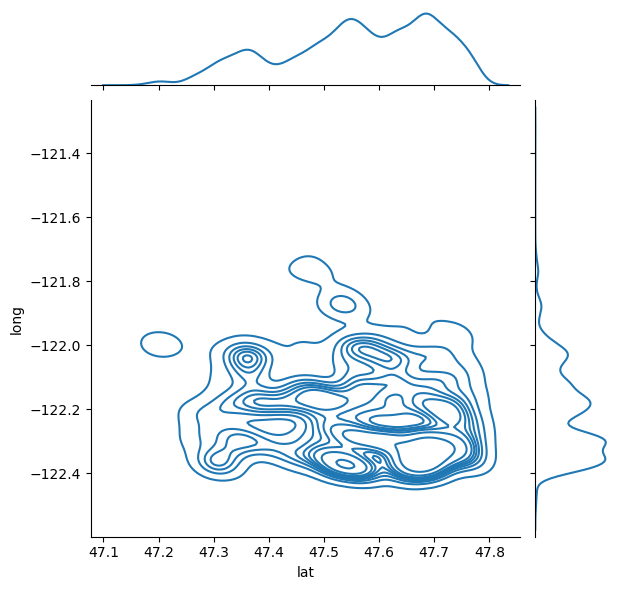

In [10]:
counts=df ['waterfront'].value_counts()
plt.scatter (x=counts.index, y=counts.values)
plt.title ('Распределение')
plt.xlabel ('Отделенность')
plt.ylabel ('Стоимость')
sns.jointplot(x=df['lat'], y=df['long'], kind='kde');

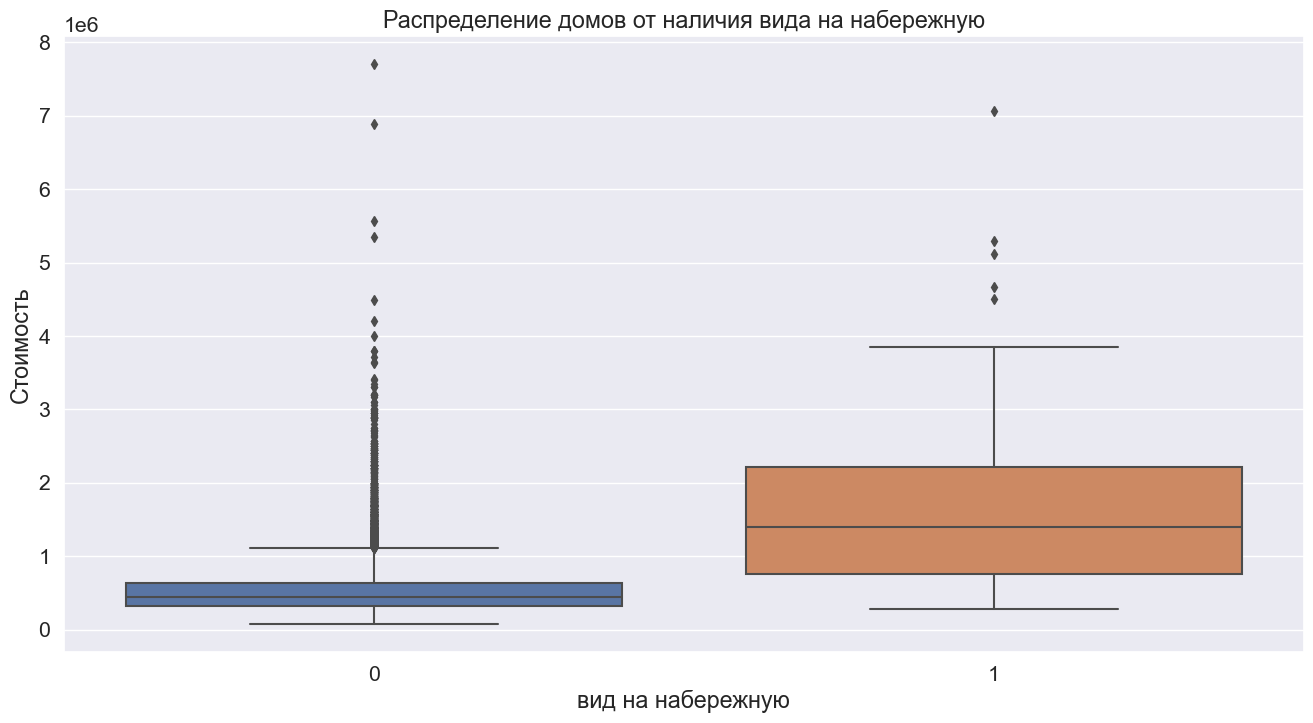

In [32]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['waterfront'], y=df['price'], whis=1.5)

plt.xlabel('вид на набережную')
plt.ylabel('Стоимость')
plt.title('Распределение домов от наличия вида на набережную');

Более дешевые дома без вида на набережную.

### Задача 2.2 Изучите распределение этажей домов

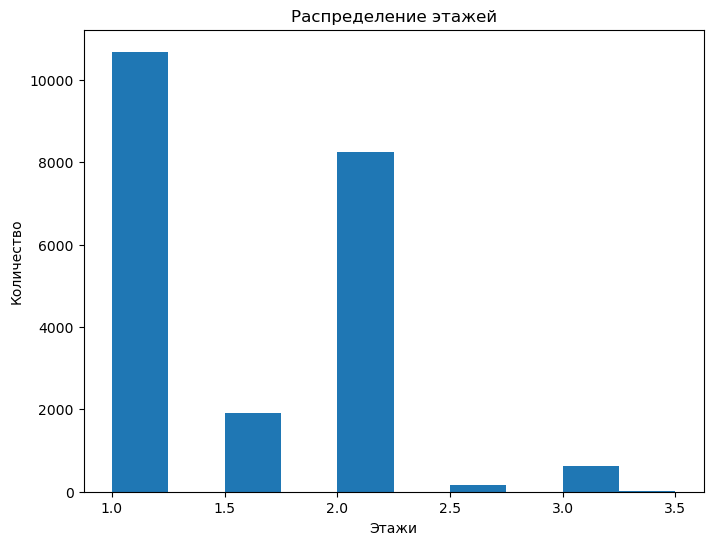

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df['floors'])
plt.title('Распределение этажей')
plt.xlabel('Этажи')
plt.ylabel('Количество');

Больше всего 1 и 2х этажных домов.

### Задача 2.3 Изучите распределение состояния домов

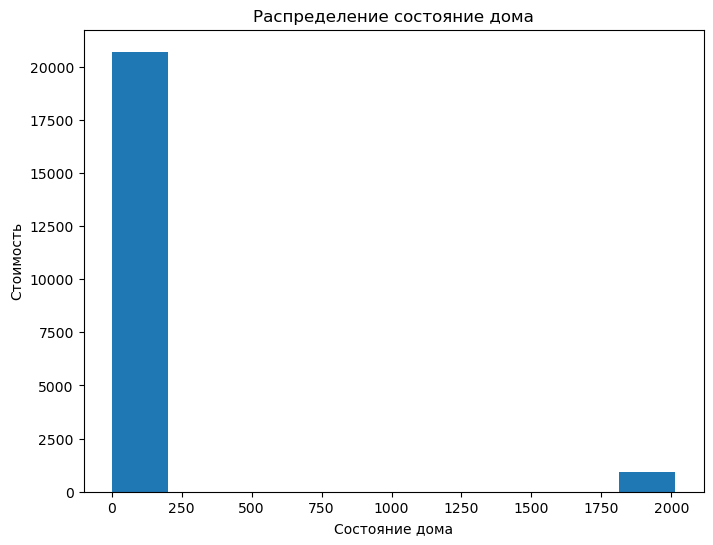

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['yr_renovated'])
plt.title('Распределение cостояние дома')
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость');

## Задача 3 Что влияет на стоимость недвижимости

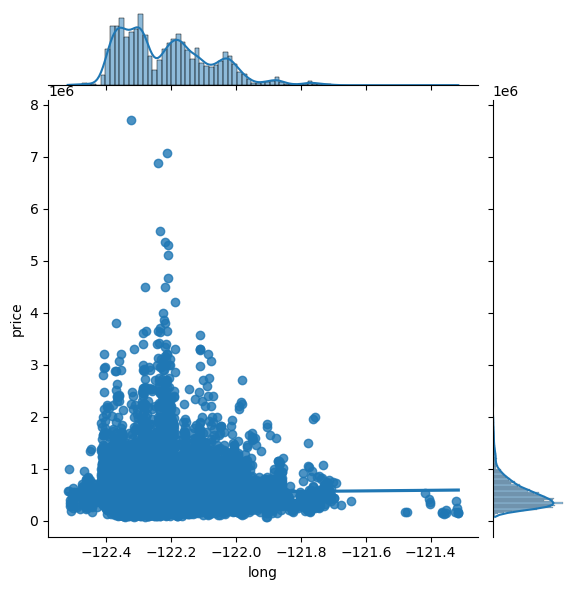

In [26]:
sns.jointplot(x=df['long'], y=df['price'], kind='reg');

Месторасположение влияет на стоимость.

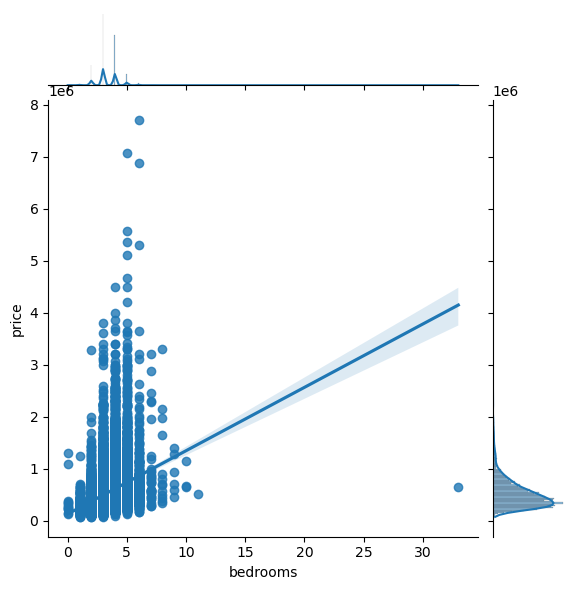

In [16]:
sns.jointplot(x=df['bedrooms'], y=df['price'], kind='reg');

Количество комнат влияет на стоимость.

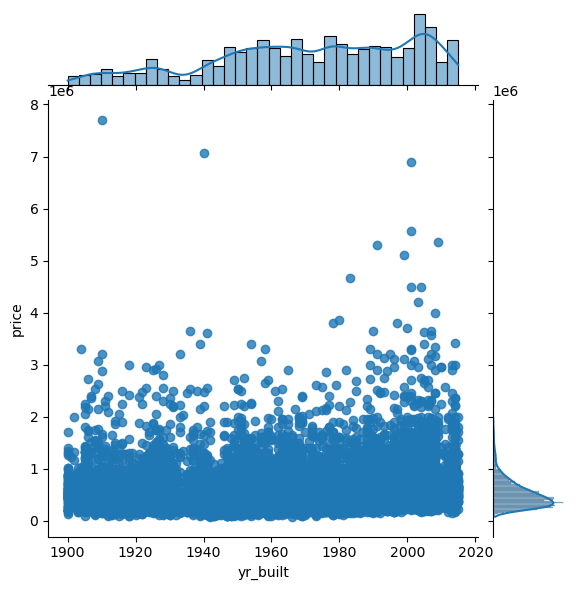

In [17]:
sns.jointplot(x=df['yr_built'], y=df['price'], kind='reg');

Чем новее дом, тем он дороже.

C:\Users\Zver\AppData\Local\Temp\ipykernel_6596\2326507595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


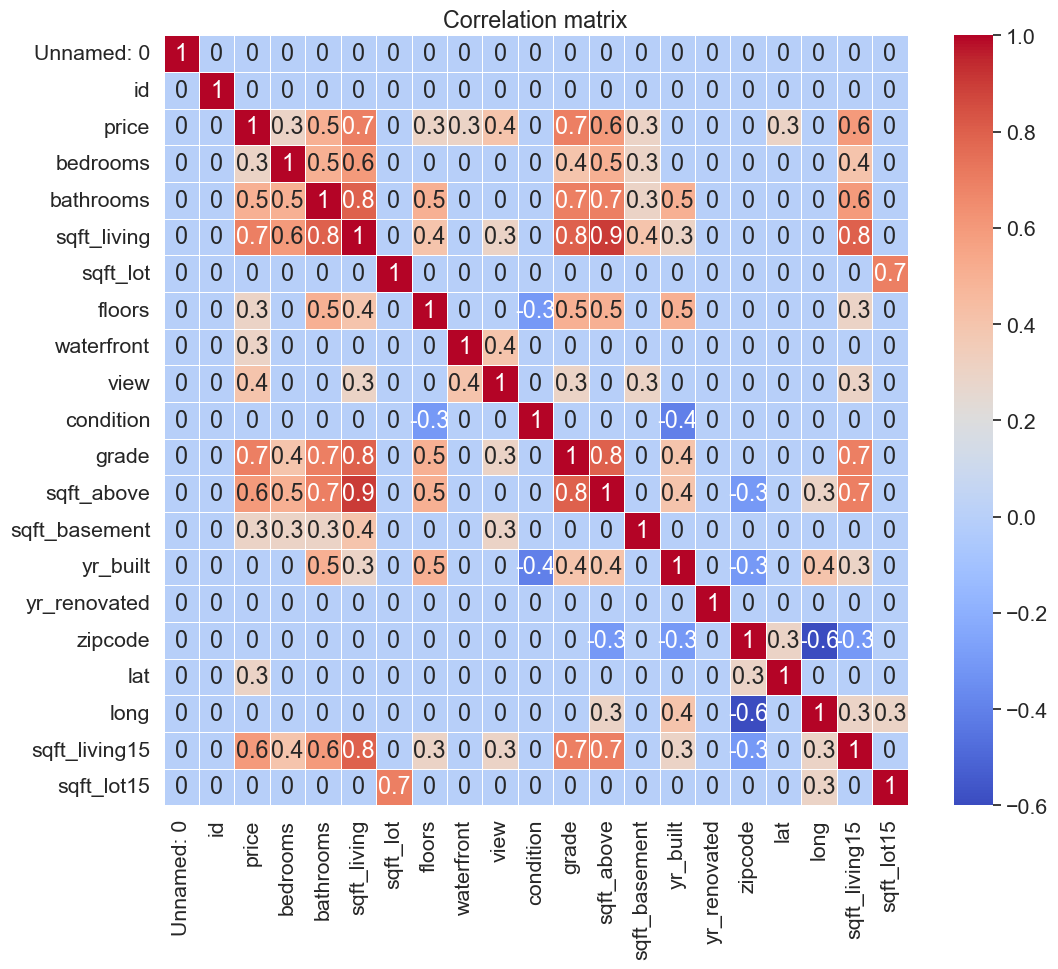

In [31]:
corr_matrix = df.corr()
corr_matrix = round(corr_matrix, 1)
corr_matrix[abs(corr_matrix) < 0.3] = 0
corr_matrix
plt.figure(figsize=(12, 10))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

Есть несколько сильных связей. Например, между жизнью и оценкой, жизнь и выше (не смогла адекватно перевести эти показатели). Наличие ванной комнаты влияет на качество жизни. Вид на набережную влияет только на стоимость и то незначительно.